In [6]:
import numpy as np
from skimage import io, util, measure, transform
from scipy.ndimage import gaussian_filter
from scipy import interpolate
import pandas as pd
from imageUtils import normalize_image_intensity_signed

from os import path
import stackview
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator

from measurements import get_mesh_from_bm_image, export_mesh, get_tissue_curvature_over_grid

from trimesh import Trimesh
import pyvista as pv
pv.set_jupyter_backend('trame')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
dirname = '/Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Two photon/Shared/K10 paw/K10-R1/'

k10 = io.imread(path.join(dirname,'Cropped/G.tif'))
height_image = io.imread(path.join(dirname,'Image flattening/height_image.tif'))
heightmap = io.imread(path.join(dirname,'Image flattening/heightmap.tif'))
mesh = get_mesh_from_bm_image(height_image)
curvature,gaussian_curvature = get_tissue_curvature_over_grid(mesh,k10.shape)

stackview.orthogonal(k10, zoom_factor=0.5,continuous_update=True)

In [30]:
pl = pv.Plotter()
pl.add_mesh(mesh)
pl.show()

Widget(value='<iframe src="http://localhost:52095/index.html?ui=P_0x30c971310_1&reconnect=auto" class="pyvista…

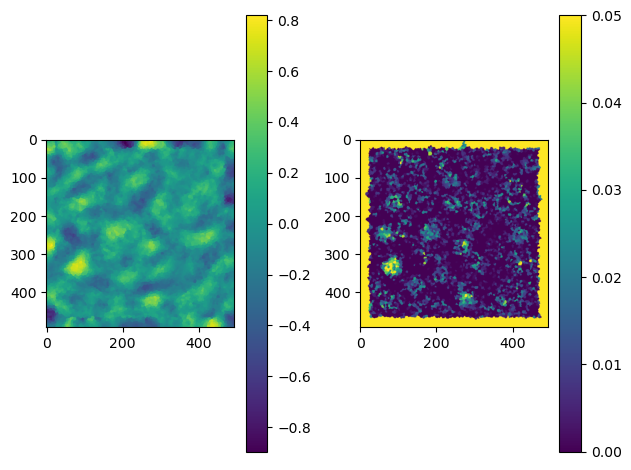

In [46]:
plt.subplot(1,2,1)
plt.imshow(curvature)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(gaussian_curvature,vmin=0,vmax=.05)
plt.colorbar()

plt.tight_layout()

In [63]:
# Construct slicer
Nslice = 10
k10_resliced = np.zeros((Nslice,*heightmap.shape),dtype=np.uint16)
for i in range(Nslice):
    _heightmap = np.clip(heightmap-5+i,a_min=0,a_max=k10.shape[0]-1)
    k10_resliced[i,:,:] = np.take_along_axis(k10, _heightmap[np.newaxis, :, :],axis=0)

io.imsave(path.join(dirname,'k10_resliced.tif'),k10_resliced)
stackview.slice(k10_resliced,zoom_factor=0.5)

/opt/miniconda3/envs/jupyter/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: /Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Two photon/Shared/K10 paw/K10-R1/k10_resliced.tif is a low contrast image
  return func(*args, **kwargs)


In [64]:
stackview.switch({'k10':k10_resliced.max(axis=0),
                    'mean':curvature},
                colormap=['pure_green','pure_magenta'],
                toggleable=True)